In [8]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [10]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [11]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [16]:
print(df_market_data.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [25]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)


In [27]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
# All of the steps above are done in the next senteces.

df_scaled= pd.DataFrame(scaled_data,columns=df_market_data.columns, index= df_market_data.index)
# Display sample data
df_scaled.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [56]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1,12)




In [ ]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans= KMeans(n_clusters=k, random_state=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

In [67]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data={'k': k_values, 'inertia':inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow= pd.DataFrame(elbow_data)
df_elbow


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,38.072792
5,6,27.618972
6,7,21.134056
7,8,17.573178
8,9,13.908202
9,10,10.484890


In [59]:
#To create the plot 
import matplotlib.pyplot as plt

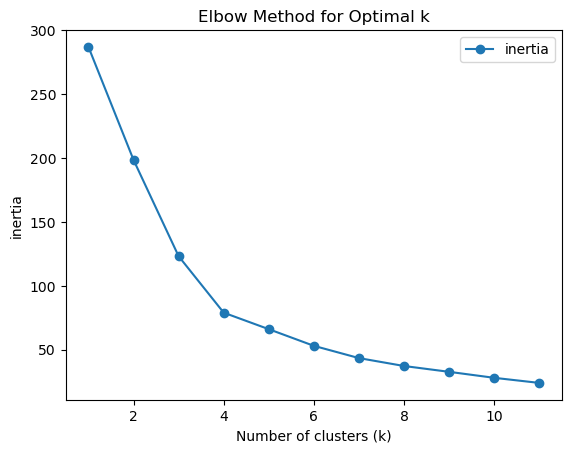

In [60]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot(x='k', y='inertia', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:  According with the plot, I think that the best k is 4 since here is where the inertia starts to decrease more slowly** 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [61]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans (n_clusters= best_k, random_state=10)

In [62]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_scaled)

/Users/breeze/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=10)

In [36]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters= kmeans.predict(df_scaled)
# Print the resulting array of cluster values.
clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [37]:
# Create a copy of the DataFrame
df_copy_original_data= df_market_data.copy()


In [38]:
# Add a new column to the DataFrame with the predicted clusters
df_copy_original_data["cluster"] = clusters

# Display sample data
df_copy_original_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [93]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_copy_original_data.hvplot.scatter(x="price_change_percentage_24h",y="price_change_percentage_7d", by="cluster",hover_cols=["coin_id"])



:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [40]:
# Create a PCA model instance and set `n_components=3`.
pca= PCA(n_components=3)

In [45]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled)
# View the first five rows of the DataFrame. 
df_pca= pd.DataFrame(pca_data, columns=['PC1','PC2','PC3'],index=df_scaled.index)
df_pca.head(5)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [46]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explanied_variance = pca.explained_variance_ratio_

print('Explained variance of each principal components:', sum(explanied_variance))


Explained variance of each principal components: 0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [49]:
# Create a new DataFrame with the PCA data. 
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
# All the request above were accomplished with the next sentese.
df_pca_new= pd.DataFrame(pca_data, columns=['PC1','PC2','PC3'],index=df_market_data.index)

# Display sample data

df_pca_new.head(5)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [63]:
# Create a list with the number of k-values from 1 to 11
k_values= range(1,12)

In [ ]:
# Create an empty list to store the inertia values
inertia_values= []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans= KMeans(n_clusters = k , random_state=10)
    kmeans.fit(df_pca)
    inertia_values.append(kmeans.inertia_)

In [85]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca= {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
df_elbow_pca

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.866859
6,7,21.182776
7,8,17.670507
8,9,13.667065
9,10,10.692323


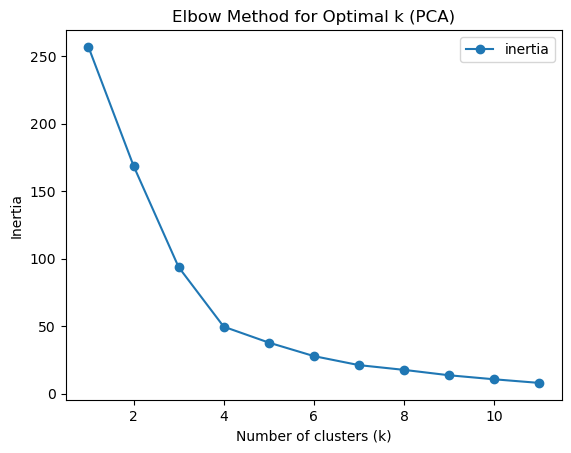

In [86]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot(x='k',y='inertia', marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA)')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: Again 4 is the k where inertia start to decrease more slowly**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:No, it give me very near results** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [79]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4
kmeans_pca= KMeans(n_clusters=best_k_pca, random_state=42)


In [80]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca)


/Users/breeze/anaconda3/envs/dev/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [81]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca= kmeans_pca.predict(df_pca)
# Print the resulting array of cluster values.
print(clusters_pca)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [82]:
# Create a copy of the DataFrame with the PCA data

df_copy_pca_data= df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters

df_copy_pca_data['cluster']=clusters_pca
# Display sample data

df_copy_pca_data.head(5)

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [83]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_copy_pca_data.hvplot.scatter(x='PC1',y='PC2',by='cluster',hover_color='coin_id')


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

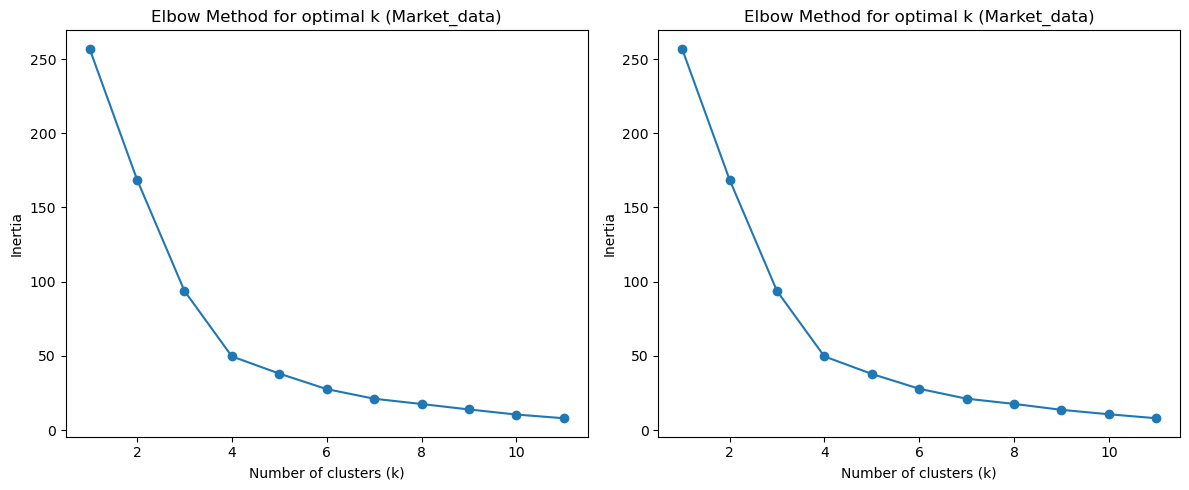

In [88]:
# Composite plot to contrast the Elbow curves

fig, axes = plt.subplots(1,2, figsize=(12,5))
    #original data
axes[0].plot(df_elbow['k'],df_elbow['inertia'],marker='o')
axes[0].set_title('Elbow Method for optimal k (Market_data)')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
    #pca data
axes[1].plot(df_elbow_pca['k'],df_elbow_pca['inertia'],marker='o')
axes[1].set_title('Elbow Method for optimal k (Market_data)')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Inertia')


plt.tight_layout()
plt.show()




In [94]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

scatter_original= df_copy_original_data.hvplot.scatter(x="price_change_percentage_24h",y="price_change_percentage_7d", by="cluster",hover_cols=["coin_id"])

scatter_pca = df_copy_pca_data.hvplot.scatter(x='PC1',y='PC2',by='cluster',hover_color='coin_id')

scatter_original + scatter_pca


:Layout
   .NdOverlay.I  :NdOverlay   [cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:If we use fewer features to cluster the impact if about the dimension are  reducted throught the PCA method allowing a simpler computation and visiualization  vs the original data ** 